<a href="https://colab.research.google.com/github/chgayathri07/Streamlit-Powered-YouTube-Data-Warehouse/blob/main/laptop_pices_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Business & Data Understanding  
Goal is to understand the problem and the dataset.

In [69]:
import pandas as pd

In [70]:
laptop= pd.read_csv('laptop.csv')

#Data exploration

In [71]:
laptop.shape

(1303, 13)

In [72]:
laptop.info()#data info and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [73]:
laptop.head()# View first few rows

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [74]:
laptop.tail()# View last few rows

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [75]:
laptop.isnull().sum()#checking for missing values

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

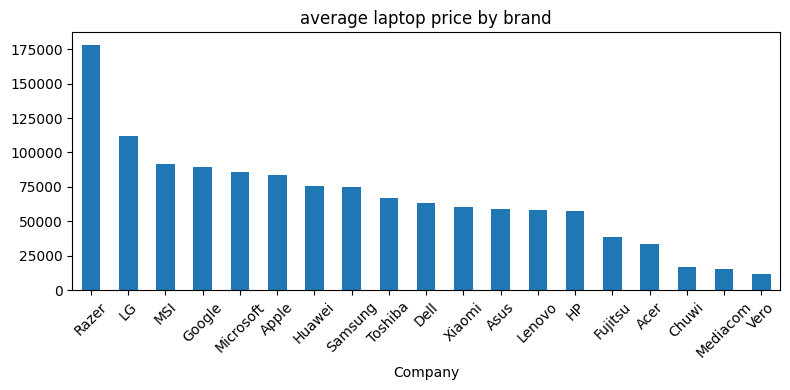

In [77]:
plt.figure(figsize=(8,4))
avg_price_by_brand = laptop.groupby('Company')['Price'].mean().sort_values(ascending=False)
avg_price_by_brand.plot(kind='bar')
plt.title("average laptop price by brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Razer,LG are highest average prices

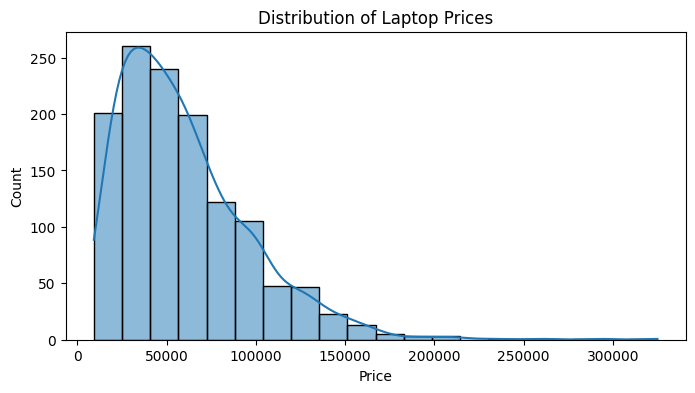

In [78]:
plt.figure(figsize=(8, 4))
sns.histplot(laptop['Price'], bins=20, kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()
#prices are right skewed,so prices fall within moderate price range

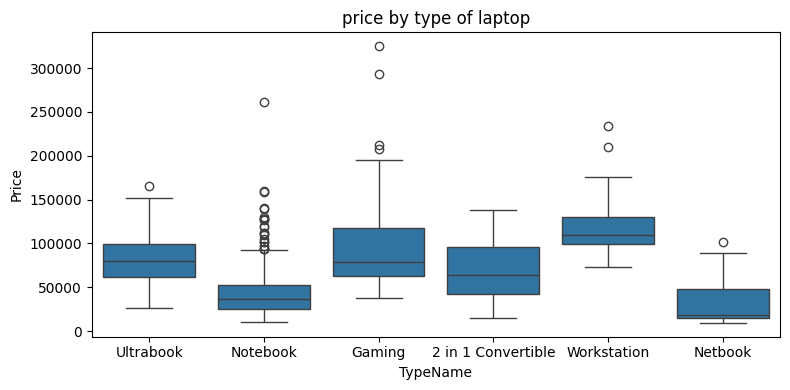

In [79]:
#price by type of laptop
plt.figure(figsize=(8,4))
sns.boxplot(data=laptop,x='TypeName',y='Price')
plt.title('price by type of laptop')
plt.tight_layout()
plt.show()
#workstation,gaming laptops are priced the highest

#2. Data Preparation  
Goal is to make data clean and ready for modeling.

In [80]:
# Drop unnecessary columns
laptop=laptop.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [81]:
print(laptop.isnull().sum())

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [82]:
print("Before drop:", laptop.shape)

Before drop: (1303, 11)


In [83]:
laptop_clean=laptop.dropna()#drops 30 rows with missing values

In [84]:
print("After drop:", laptop_clean.shape)

After drop: (1273, 11)


## Cleaning and converting data types

In [85]:
#Removing 'kg' from 'Weight' and convert to float
#Converting Weight column to string before using .str.replace()
#regex=False tells pandas to treat 'kg' as a plain text.
laptop_clean['Weight'] = laptop_clean['Weight'].astype(str).str.replace('kg', '',regex=False).astype(float)

ValueError: could not convert string to float: '?'

In [87]:
#Replacing '?' with NaN
import numpy as np
laptop_clean['Weight'] = laptop_clean['Weight'].replace('?', np.nan)

/tmp/ipython-input-87-2043158945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_clean['Weight'] = laptop_clean['Weight'].replace('?', np.nan)


In [88]:
laptop_clean.loc[:, 'Weight'] = laptop_clean['Weight'].replace('?', np.nan)

In [89]:
# Drop rows with missing weight
laptop_clean = laptop_clean.dropna(subset=['Weight'])

In [90]:
laptop_clean['Weight'] = laptop_clean['Weight'].astype(str).str.replace('kg', '',regex=False).astype(float)

In [91]:
# Remove 'GB' from 'Ram' and convert to int
laptop_clean['Ram'] = laptop_clean['Ram'].str.replace('GB', '').astype(int)

In [92]:
laptop_clean['Inches'] = laptop_clean['Inches'].astype(float)

ValueError: could not convert string to float: '?'

In [93]:
laptop_clean['Inches'] = laptop_clean['Inches'].replace('?', np.nan)
laptop_clean = laptop_clean.dropna(subset=['Inches'])

In [94]:
laptop_clean['Inches'] = laptop_clean['Inches'].astype(float)

In [95]:
laptop_clean[['Weight', 'Ram', 'Inches']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  1271 non-null   float64
 1   Ram     1271 non-null   int64  
 2   Inches  1271 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 39.7 KB


In [96]:
# Reset index
# as the 2 rows are dropped it makes the index discontinuous
# After cleaning and dropping missing rows
laptop_clean.reset_index(drop=True, inplace=True)

laptop_clean.info()
laptop_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   int64  
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float64
 10  Price             1271 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.4+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


##Feature Engineering
Goal is to enhance or create useful features for the model

In [97]:
# Extract CPU brand
laptop['Cpu_brand'] = laptop['Cpu'].astype(str).apply(lambda x: x.split()[0])

In [98]:
# Memory: Spliting SSD, HDD
# Handling missing values
def convert_memory(mem_string):
    try:
        mem_string = str(mem_string).replace('GB', '').replace('TB', '000')
        parts = mem_string.split('+')
        total = 0
        for part in parts:
            part = part.strip()
            if any(x in part for x in ['SSD', 'HDD', 'Flash', 'Hybrid']):
                total += int(part.split()[0])
        return total
    except:
        return np.nan

In [99]:
# Convert to string to prevent type errors during feature engineering
laptop_clean['Memory'] = laptop_clean['Memory'].astype(str)


In [100]:
# HDD present
laptop_clean['HAS_HDD'] = laptop_clean['Memory'].apply(lambda x: 1 if 'HDD' in str(x) else 0)
# SSD present
laptop_clean['HAS_SSD'] = laptop_clean['Memory'].apply(lambda x: 1 if 'SSD' in str(x) else 0)
# Flash storage present
laptop_clean['HAS_FLASH'] = laptop_clean['Memory'].apply(lambda x: 1 if 'Flash' in str(x) else 0)
# Hybrid storage present
laptop_clean['HAS_HYBRID'] = laptop_clean['Memory'].apply(lambda x: 1 if 'Hybrid' in str(x) else 0)

In [101]:
laptop_clean[['Memory', 'HAS_SSD', 'HAS_HDD','HAS_FLASH','HAS_HYBRID']].sample(5)

,Memory,HAS_SSD,HAS_HDD,HAS_FLASH,HAS_HYBRID
46,256GB SSD,1,0,0,0
862,1TB HDD,0,1,0,0
372,512GB SSD,1,0,0,0
872,1TB HDD,0,1,0,0
439,256GB SSD,1,0,0,0


In [102]:
laptop_clean['Cpu_brand'] = laptop_clean['Cpu'].apply(lambda x: x.split()[0])

In [103]:
# Drop original 'Cpu' and 'Memory'
laptop_clean.drop(columns=['Cpu', 'Memory'], inplace=True)

In [104]:
laptop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Ram               1271 non-null   int64  
 5   Gpu               1271 non-null   object 
 6   OpSys             1271 non-null   object 
 7   Weight            1271 non-null   float64
 8   Price             1271 non-null   float64
 9   HAS_HDD           1271 non-null   int64  
 10  HAS_SSD           1271 non-null   int64  
 11  HAS_FLASH         1271 non-null   int64  
 12  HAS_HYBRID        1271 non-null   int64  
 13  Cpu_brand         1271 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 139.1+ KB


##Encoding of the data

In [105]:
#label encoding
#Gpu,ScreenResolution has too many categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
laptop_clean['Gpu_encoded'] = le.fit_transform(laptop_clean['Gpu'])
laptop_clean['Screen_encoded'] = le.fit_transform(laptop_clean['ScreenResolution'])
laptop_clean.drop(columns=['Gpu', 'ScreenResolution'], inplace=True)

In [106]:
#Converting Categorical Variables using One-Hot Encoding.
#columns having fewer categories
laptop_clean_encoded = pd.get_dummies(laptop_clean, columns=['Company', 'TypeName', 'OpSys', 'Cpu_brand'], drop_first=True)

In [146]:
print(laptop_clean_encoded.shape)
laptop_clean_encoded.head()

(1271, 43)


,Inches,Ram,Weight,Price,HAS_HDD,HAS_SSD,HAS_FLASH,HAS_HYBRID,Gpu_encoded,Screen_encoded,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Cpu_brand_Intel,Cpu_brand_Samsung
0,13.3,8,1.37,71378.6832,0,1,0,0,58,23,...,False,False,False,False,False,False,False,True,True,False
1,13.3,8,1.34,47895.5232,0,0,1,0,51,1,...,False,False,False,False,False,False,False,True,True,False
2,15.6,8,1.86,30636.0000,0,1,0,0,53,8,...,False,False,False,True,False,False,False,False,True,False
3,15.4,16,1.83,135195.3360,0,1,0,0,9,25,...,False,False,False,False,False,False,False,True,True,False
4,13.3,8,1.37,96095.8080,0,1,0,0,59,23,...,False,False,False,False,False,False,False,True,True,False


#Model building
Goal is to train and evaluate ML models.

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [163]:
# Define input and target
X = laptop_clean_encoded.drop('Price', axis=1)
y = laptop_clean_encoded['Price']

In [164]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 202603533.00759554
R2 Score: 0.8599307203284974


In [166]:
# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 14233.88678497885
R2 Score: 0.8599307203284974


#Model evaluation  
Selecting the best model based on performance metrics.

In [178]:
# Train and evaluate
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Append results
    results['Model'].append(name)

    results['MAE'].append(mean_absolute_error(y_test, preds))
    results['R2 Score'].append(r2_score(y_test, preds))

Training model: Random Forest
Training model: Linear Regression
Training model: Gradient Boosting


In [179]:
from sklearn.metrics import mean_absolute_error

best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 9377.765515135916


In [195]:
# Define models
models = {
    "RF": RandomForestRegressor(random_state=42),
    "LR": LinearRegression(),
    "GB": GradientBoostingRegressor(random_state=42)
}

# Compare performance
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f" {name}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE : {mae:.2f}")
    print(f"  R²  : {r2:.4f}\n")

 RF
  RMSE: 230631916.23
  MAE : 9323.07
  R²  : 0.8406

 LR
  RMSE: 388868588.30
  MAE : 12738.45
  R²  : 0.7312

 GB
  RMSE: 202603533.01
  MAE : 9577.12
  R²  : 0.8599



Gradient Boosting performs best(lowest RMSE and MAE, highest R²)

In [196]:
# Store results
results = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': []
}


In [197]:
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results['Model'].append(name)
    results['RMSE'].append(mean_squared_error(y_test, preds))
    results['MAE'].append(mean_absolute_error(y_test, preds))
    results['R2 Score'].append(r2_score(y_test, preds))

Training model: RF
Training model: LR
Training model: GB


In [198]:
# Create DataFrame for visualization
results_df = pd.DataFrame(results)

In [199]:
print(results_df)

  Model          RMSE           MAE  R2 Score
0    RF  2.306319e+08   9323.069782  0.840553
1    LR  3.888686e+08  12738.447070  0.731157
2    GB  2.026035e+08   9577.120304  0.859931


In [206]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

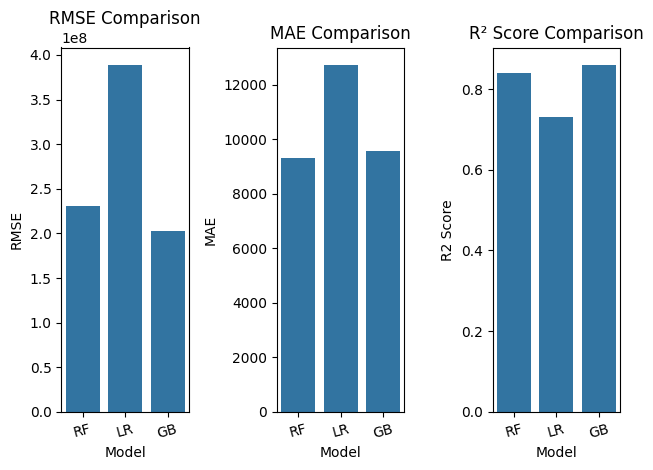

In [207]:
# RMSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE Comparison')
plt.xticks(rotation=15)

# MAE plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE Comparison')
plt.xticks(rotation=15)

# R2 Score plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('R² Score Comparison')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

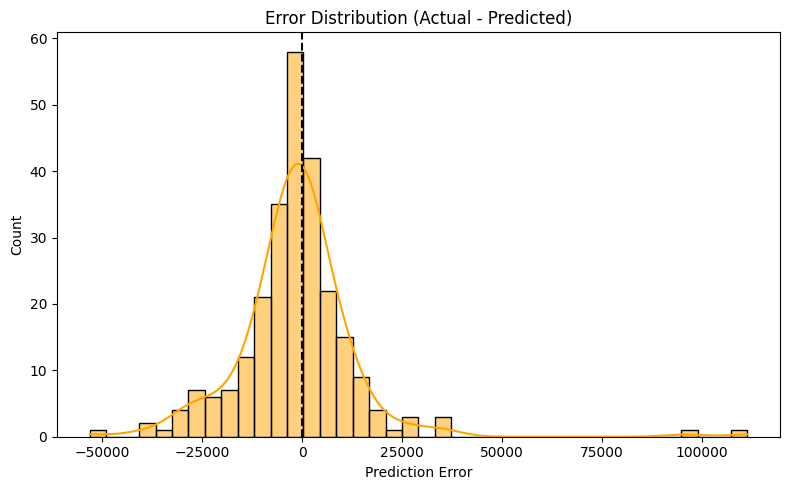

In [213]:
plt.figure(figsize=(8, 5))
sns.histplot(plot_df['Error'], bins=40, kde=True, color='orange')
plt.axvline(0, linestyle='--', color='black')
plt.title('Error Distribution (Actual - Predicted)')
plt.xlabel('Prediction Error')
plt.tight_layout()
plt.show()


In [214]:
# Create DataFrame for plotting
plot_df = X_test.copy()
plot_df['Actual'] = y_test.values
plot_df['Predicted'] = y_pred
plot_df['Error'] = plot_df['Actual'] - plot_df['Predicted']

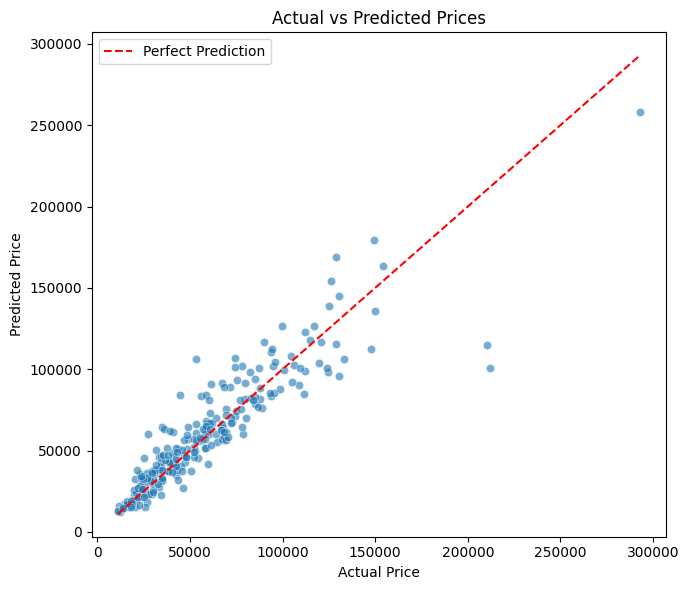

In [215]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_df, alpha=0.6)
plt.plot([plot_df['Actual'].min(), plot_df['Actual'].max()],
         [plot_df['Actual'].min(), plot_df['Actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.tight_layout()
plt.show()